C:\Users\cande\AppData\Local\Temp\ipykernel_13372\2596973279.py:40: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 12


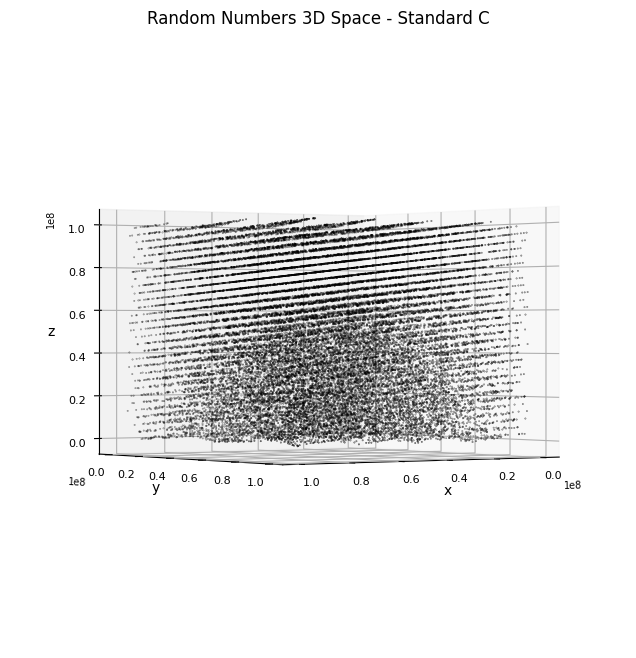

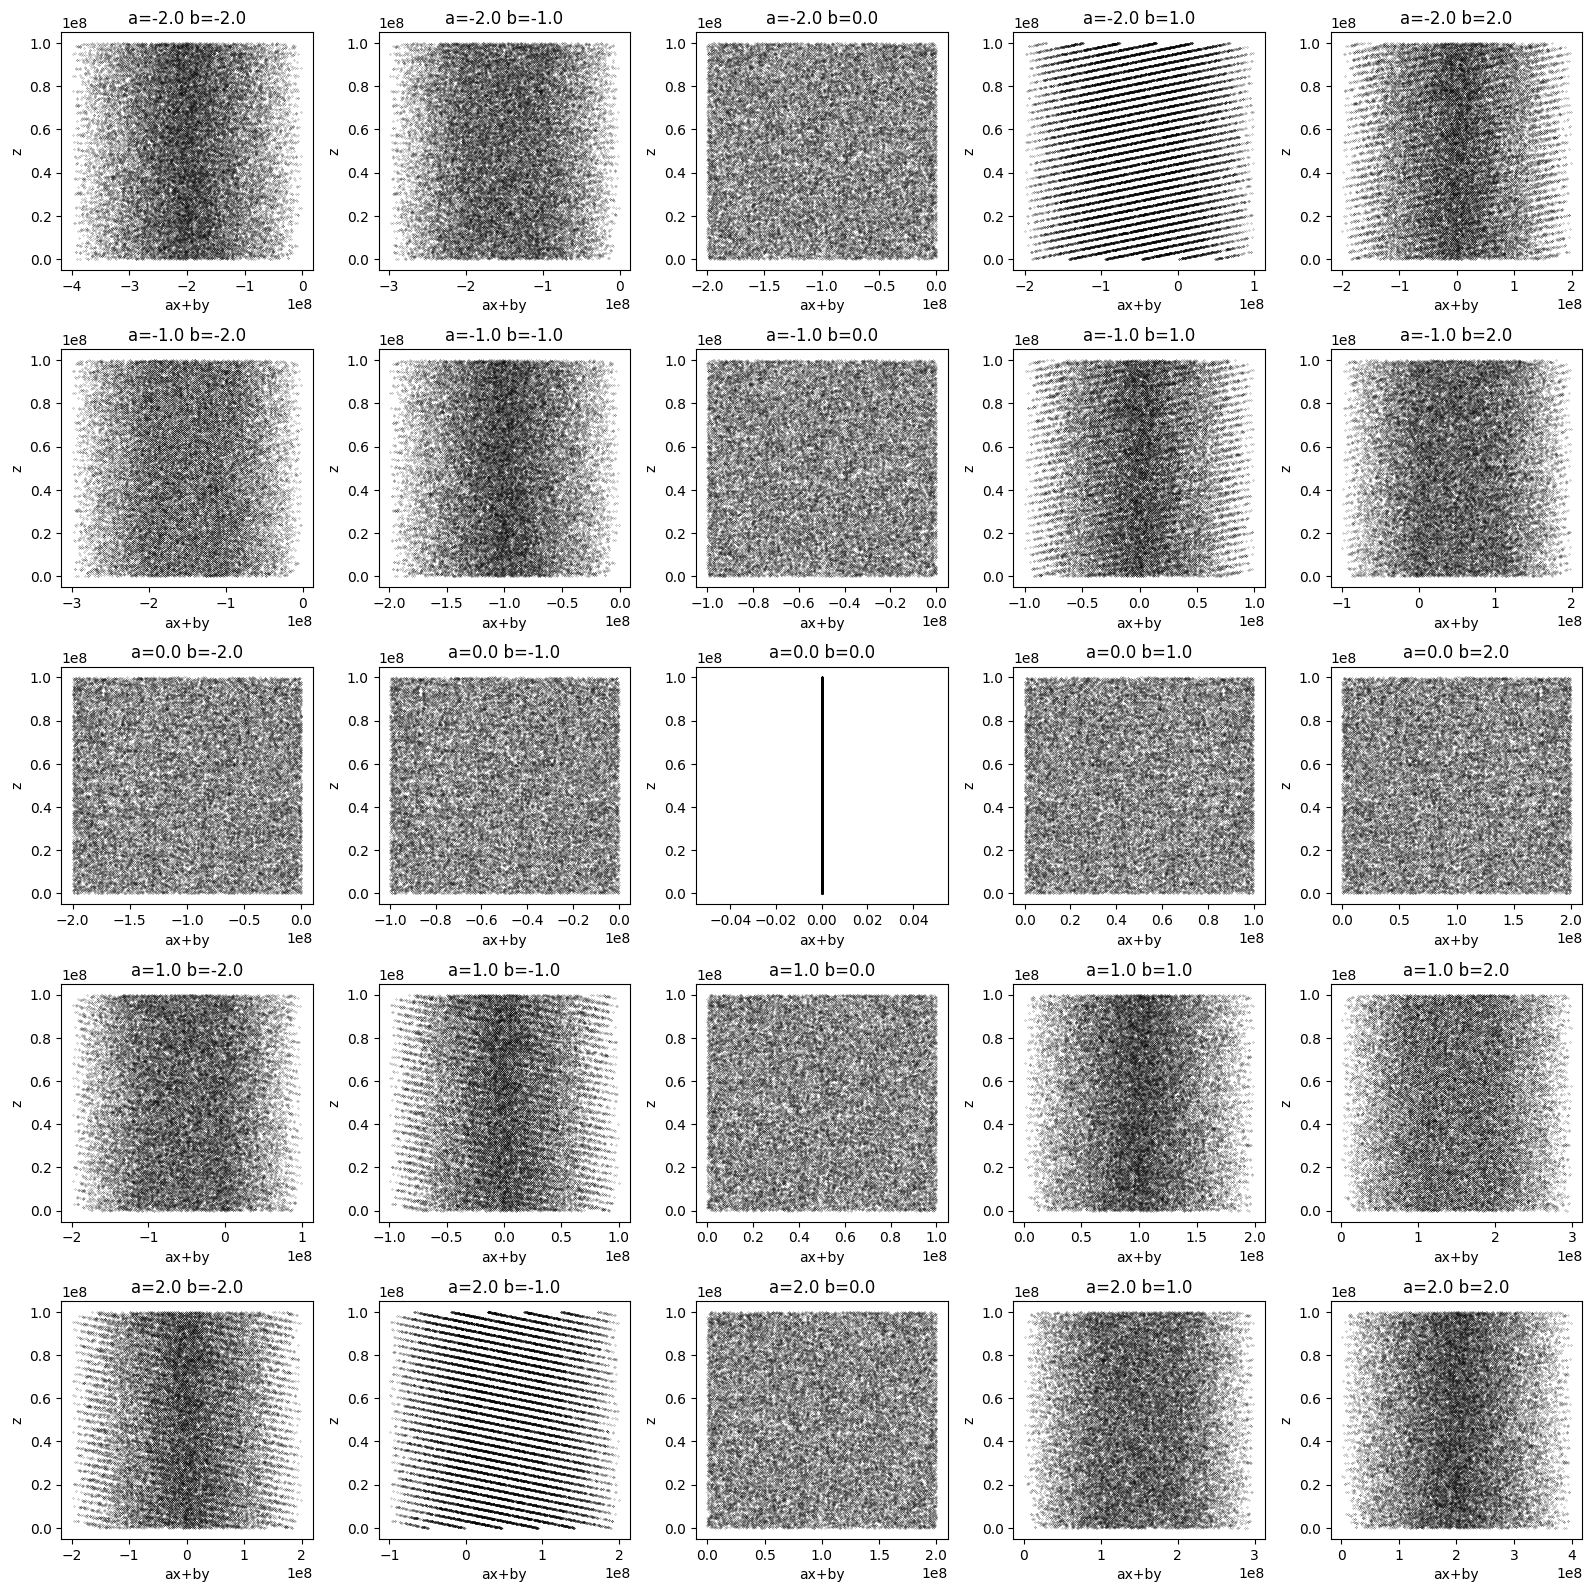

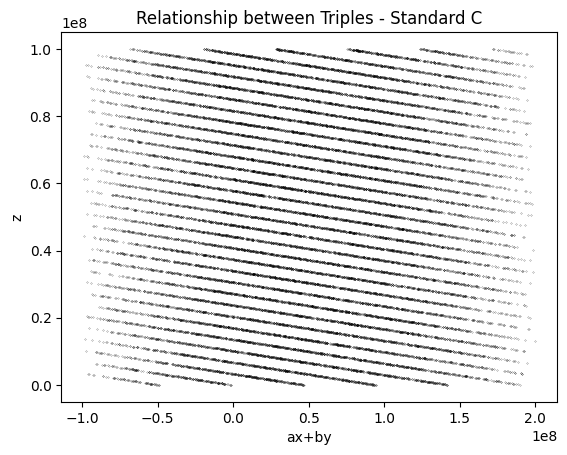

In [32]:
##############Assignment 7#################
###########################################

import numpy as np
from matplotlib import pyplot as plt
import random
import ctypes
import numba as nb


#################Problem 1#################
###########################################

#function to  generate plane cross-section lines
def lines(x,y,a,b):
    return a*x +b*y

#load random points data points
randpts=np.loadtxt('rand_points.txt', dtype=np.int32)


#plot 3D
rx=randpts[:,0]
ry=randpts[:,1]
rz=randpts[:,2]

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(rx,ry,rz,s=0.1, color='black')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=0, azim=55, roll = 0)
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.xaxis.offsetText.set_fontsize(7)
ax.yaxis.offsetText.set_fontsize(7)
ax.zaxis.offsetText.set_fontsize(7)
plt.title('Random Numbers 3D Space - Standard C')
ax.dist = 12
plt.show()

#generate plane cross-section lines for various linear combinations
#ax+by=z

azlines=randpts[:, 2]#z values
avs= np.linspace(-2,2,5)#check for a and b in [-2,2] span
bvs=avs.copy()

plt.figure(figsize=(16,16))
#plot cross-section lines
for i in range(len(avs)):
    for j in range(len(bvs)):
        axylines=lines(randpts[:,0],randpts[:, 1], avs[i], bvs[j])
        plt.subplot(5,5,i*5+j+1)
        plt.plot(axylines, azlines, '.k', ms='0.3')
        plt.title('a={} b={}'.format(avs[i],bvs[j]))
        plt.xlabel('ax+by')
        plt.ylabel('z')
        plt.tight_layout(pad=1.0)
plt.show()

#generate plane cross-section lines for a=2 and b=-1 -->  ax+by=z
xylines=lines(randpts[:,0],randpts[:, 1], 2, -1)
zlines=randpts[:, 2]

#plot cross-section lines
plt.clf()
plt.plot(xylines, zlines, '.k', ms='0.3')
plt.xlabel('ax+by')
plt.ylabel('z')
plt.title('Relationship between Triples - Standard C')
plt.show()

C:\Users\cande\AppData\Local\Temp\ipykernel_13372\1318572011.py:29: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 12


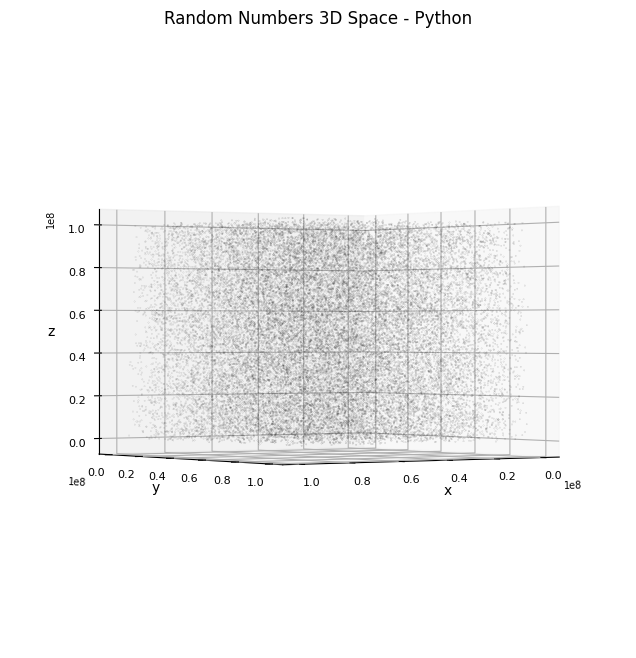

In [61]:
#visualize python random number generation results
#generate random numbers
# pn=300000
pvec=np.random.randint(low=0, high=1e8, size=len(randpts)*3)
prandpts=pvec.reshape((-1,3));
# pvv=np.reshape(pvec,[pn,3])
# pvmax=np.max(pvv,axis=1)
# pmaxval=1e8
# prandpts=pvv[pvmax<pmaxval,:]

#plot 3D
prx=prandpts[:,0]
pry=prandpts[:,1]
prz=prandpts[:,2]

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(prx,pry,prz,s=0.005, color='black')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=0, azim=55, roll = 0)
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=8)
ax.xaxis.offsetText.set_fontsize(7)
ax.yaxis.offsetText.set_fontsize(7)
ax.zaxis.offsetText.set_fontsize(7)
plt.title('Random Numbers 3D Space - Python')
ax.dist = 12
plt.show()

C:\Users\cande\AppData\Local\Temp\ipykernel_13372\1039764794.py:59: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 12


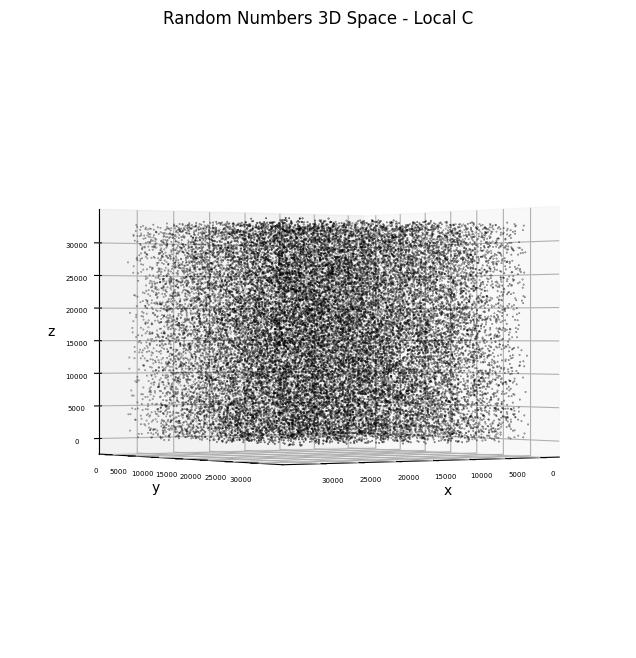

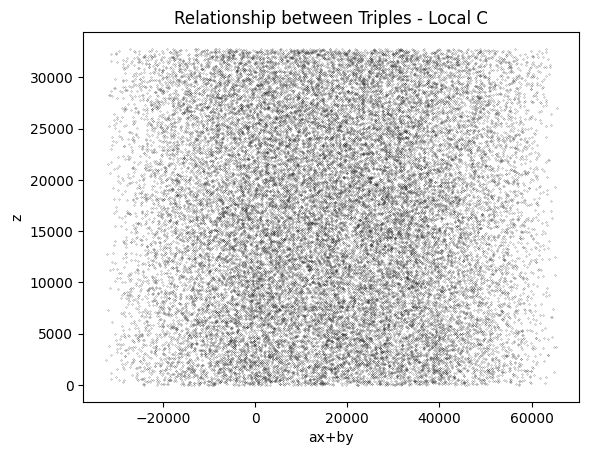

In [29]:
#import windows C libraries
#windows RAND_MAX is 32767
#cannot replicate gnu RAND_MAX of 2147483647 which generated the rand_points txt

from ctypes import *
# print(windll.kernel32)  
# print(cdll.msvcrt)      
libc = cdll.msvcrt  
mylib=libc

#generate C random numbers
rand=mylib.rand
rand.argtypes=[]
rand.restype=ctypes.c_int

#functions from class notes to generate randon number vectors
def get_rands_nb(vals):
    n=len(vals)
    for i in range(n):
        vals[i]=rand()
    return vals

def get_rands(n):
    vec=np.empty(n,dtype='int32')
    get_rands_nb(vec)
    return vec

#random number parameters
# n=3000000
n=30000
vec=get_rands(n*3)


#restructure data and truncate
vv=np.reshape(vec,[n,3])
vmax=np.max(vv,axis=1)
rmax=32767#windows setting RAND_MAX
maxval=rmax
crandpts=vv[vmax<maxval,:]

#plot 3D
crx=crandpts[:,0]
cry=crandpts[:,1]
crz=crandpts[:,2]

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(crx,cry,crz,s=0.1, color='black')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=0, azim=55, roll = 0)
ax.tick_params(axis='both', which='major', labelsize=5)
ax.tick_params(axis='both', which='minor', labelsize=5)
ax.xaxis.offsetText.set_fontsize(7)
ax.yaxis.offsetText.set_fontsize(7)
ax.zaxis.offsetText.set_fontsize(7)
plt.title('Random Numbers 3D Space - Local C')
ax.dist = 12
plt.show()

#generate plane cross-section lines
cxylines=lines(crandpts[:,0],crandpts[:, 1], 2, -1)
czlines=crandpts[:, 2]

#plot cross-section lines
plt.clf()
plt.plot(cxylines, czlines, '.k', ms='0.3')
plt.xlabel('ax+by')
plt.ylabel('z')
plt.title('Relationship between Triples - Local C')
plt.show()



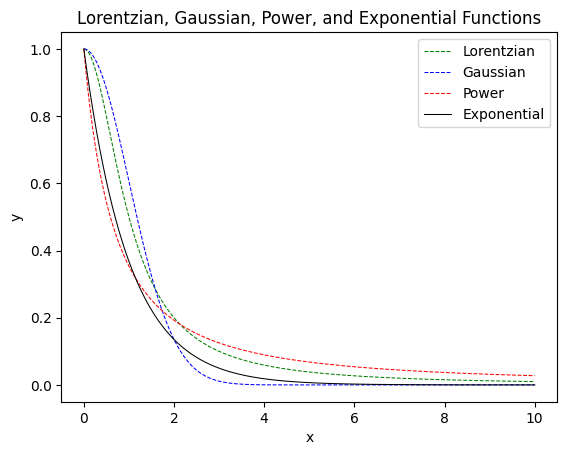

In [8]:
#################Problem 2#################
###########################################

#dfunctions to generate Lorentzian, Gaussian, Power
def lorf(x,a):
    lor=a*(1/(1+x**2))
    return lor
    
def gaussf(x,mu,sg):
    gs=np.exp((-(x-mu)**2)/(2*sg**2))
    return gs

def powf(x,a,p):
    pw=a*(x+1)**p
    return pw

#plot functions
xs=np.linspace(0, 10, 1001)
plt.clf()
plt.plot(xs, lorf(xs,1), '--g', linewidth=0.75,label="Lorentzian")
plt.plot(xs, gaussf(xs,0,1), '--b', linewidth=0.75,label="Gaussian")
plt.plot(xs, powf(xs,1,-1.5), '--r', linewidth=0.75,label="Power")
plt.plot(xs, np.exp(-xs), '-k', linewidth=0.75,label="Exponential")

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Lorentzian, Gaussian, Power, and Exponential Functions')
plt.show()





Acceptance rate is 63.638 %.
Theoretical acceptance rate is 63.662%.


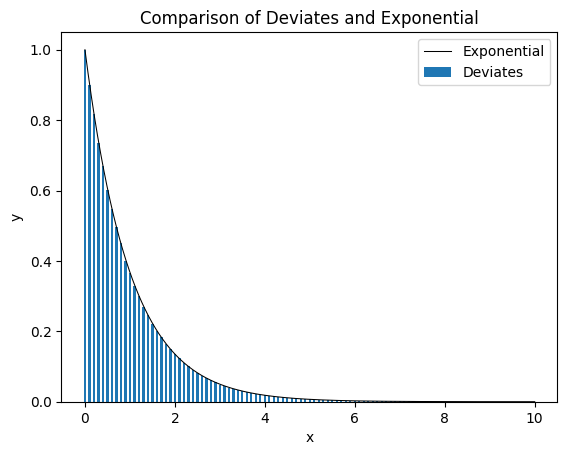

In [9]:
#Lorentzian bounds exponential comparison
Ns=3000000
randn=(np.random.rand(Ns)+1)/2 #delimit Lorentzian to positive range
lornc=np.tan(np.pi*(randn-1/2)) #from CDF of Lorentzian
lexp=np.exp(-lornc)/lorf(lornc,1)#compare exponential to Lorentzian
pacc=np.random.rand(Ns)<lexp#accept outcome
print('Acceptance rate is {} %.'.format(np.round(100*np.mean(pacc),3)))
print('Theoretical acceptance rate is {}%.'.format(np.round(100*2/np.pi,3)))

devs=lornc[pacc]#deviations

#Histogram plot
hbins=100
xlim=10

bins= np.histogram(lornc[pacc],hbins, range=(0,xlim))
plt.bar(bins[1][:-1],bins[0]/bins[0].max(),width = 0.05,label ='Deviates')
plt.plot(xs,np.exp(-xs),'-k', linewidth=0.75,label="Exponential")

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Comparison of Deviates and Exponential')
plt.show()


Acceptance rate is 67.958 %.


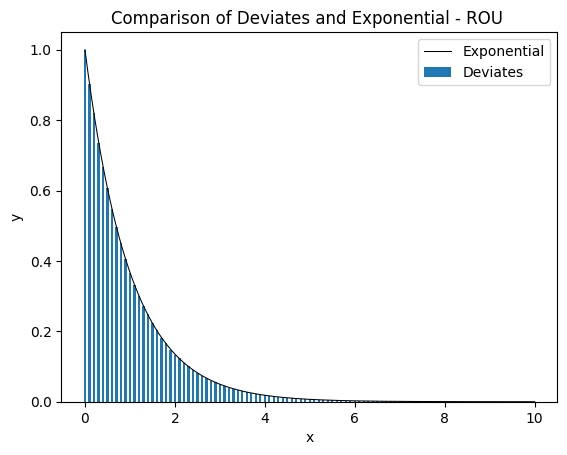

In [10]:
#################Problem 3#################
###########################################
#ROU generator
Ns=3000000
u=np.random.rand(Ns)
v=(2/np.e)*np.random.rand(Ns)
r=v/u
nacc=u<np.exp(-r/2)
nout=r[nacc]
print('Acceptance rate is {} %.'.format(np.round(100*len(nout)/len(nacc),3)))

#Histogram plot
hbins=100
xlim=10

bins= np.histogram(nout,hbins, range=(0,xlim))
plt.bar(bins[1][:-1],bins[0]/bins[0].max(),width = 0.05,label ='Deviates')
plt.plot(xs,np.exp(-xs),'-k', linewidth=0.75,label="Exponential")

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Comparison of Deviates and Exponential - ROU ')
plt.show()